#  **Problem Statement**

## **Tasks**

**1. Data Preparation**
*   Import the necessary libraries (torch, torchvision, matplotlib, etc.).
*   Load the Fashion MNIST dataset using torchvision.datasets.FashionMNIST.
*   Apply appropriate transformations (e.g., convert to tensor, normalize).
*   Split the data into training and test sets.
*   Create DataLoaders for batching and shuffling.

**2. Visualize the Data**
*   Display a few sample images along with their labels to familiarize yourself with the dataset.

**3. Build a Simple Neural Network**

Define a neural network (SimpleNet) with:
*   An input layer that flattens the 28x28 images.
*   Some hidden layers with some neurons(as you want).
*   An output layer with 10 neurons (for the 10 classes).
*   Use ReLU as the activation function after the hidden layer.

**4. Train the Network**
*   Define a loss function (nn.CrossEntropyLoss).
*   Use an optimizer (optim.SGD) with a learning rate of 0.01.
*   Train the network for 30/40/50 epochs.
*   Record the training loss after each epoch.

**5. Evaluate the Model**
*   Evaluate the trained model on the test set.
*   Calculate the overall accuracy.
*   Display the accuracy for each class.

**6. Experimentation**
*   Increase the number of neurons in the hidden layer to 10, 50, and 100.
*   Retrain the model for each configuration.
*   Compare the test accuracies and discuss the impact of increasing model complexity.

**7. Regularization Techniques (Optional)**
*   Apply dropout with a probability of 0.5 after the hidden layer.
*   Use L2 regularization by adding weight_decay to the optimizer.
*   Retrain the model and compare the results.

# **Submission**

*   Submit a Jupyter Notebook (.ipynb) containing:

 *   All the code for the tasks.
 *   Plots of training loss and any relevant visualizations.
 *   Brief comments or observations for each task.

# **Dataset Reference**


*   Fashion MNIST Dataset: https://github.com/zalandoresearch/fashion-mnist
*   PyTorch Dataset Class: torchvision.datasets.FashionMNIST

# **Note**
Keep your code and explanations concise. Focus on demonstrating your understanding of building and training neural networks with PyTorch.

#  **Solution Tasks**

###  **Step-1: Data Preparation-**

In [24]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
# Define transformations for the training and testing sets
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data to [-1, 1]
])

In [26]:
# Download and load the training data
trainset = torchvision.datasets.FashionMNIST(
    root='./data',        # Directory to store the dataset
    train=True,           # Specifies training set
    download=True,        # Downloads the dataset if not already present
    transform=transform   # Applies the transformations
)

trainloader = torch.utils.data.DataLoader(
    trainset,             # Dataset to load
    batch_size=64,        # Number of samples per batch
    shuffle=True          # Shuffle the data at every epoch
)

# Download and load the testing data
testset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,          # Specifies test set
    download=True,
    transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False         # No need to shuffle test data
)

### **Step - 2: Visualize the Data-**

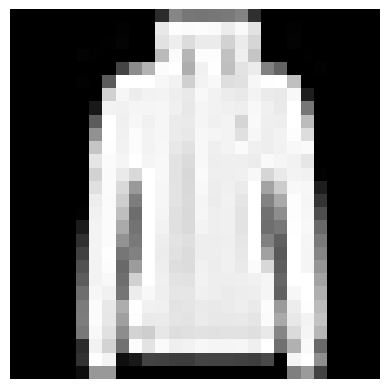

Label: Coat


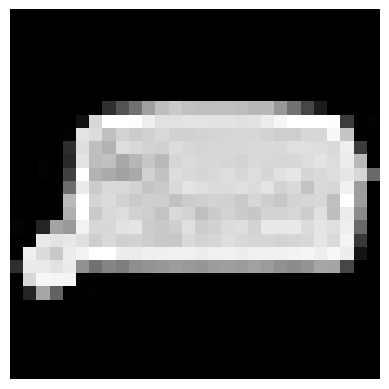

Label: Bag


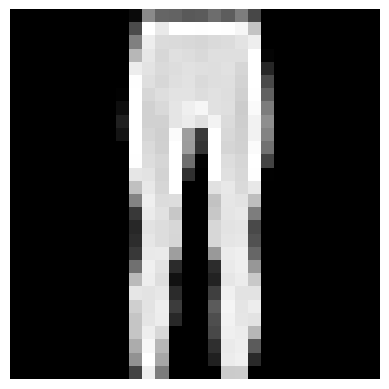

Label: Trouser


In [27]:
# Map numeric labels to class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.squeeze(npimg), cmap='gray')
    plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show one image
imshow(images[0])
print('Label:', classes[labels[0]])

imshow(images[6])
print('Label:', classes[labels[6]])

imshow(images[1])
print('Label:', classes[labels[1]])

### **Step 3: Build a Simple Neural Network-**

In [28]:
# Define a neural network SimpleNet
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)  # Hidden layer
        self.relu1 = nn.ReLU()   # Apply ReLU activation
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(64, 10)   # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the images
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.fc5(x) # Output layer (no activation, will use CrossEntropyLoss)
        return x

In [29]:
# Initialize the network
net = SimpleNet()

### **Step 4: Train the Network-**

In [30]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)  # Using Stochastic gradient descent optimizer


Training with Optimizer (SGD)
Epoch [1/30], Loss: 1.8071
Epoch [2/30], Loss: 0.7683
Epoch [3/30], Loss: 0.6204
Epoch [4/30], Loss: 0.5338
Epoch [5/30], Loss: 0.4799
Epoch [6/30], Loss: 0.4435
Epoch [7/30], Loss: 0.4174
Epoch [8/30], Loss: 0.3966
Epoch [9/30], Loss: 0.3787
Epoch [10/30], Loss: 0.3634
Epoch [11/30], Loss: 0.3503
Epoch [12/30], Loss: 0.3408
Epoch [13/30], Loss: 0.3302
Epoch [14/30], Loss: 0.3206
Epoch [15/30], Loss: 0.3087
Epoch [16/30], Loss: 0.3020
Epoch [17/30], Loss: 0.2933
Epoch [18/30], Loss: 0.2863
Epoch [19/30], Loss: 0.2788
Epoch [20/30], Loss: 0.2734
Epoch [21/30], Loss: 0.2663
Epoch [22/30], Loss: 0.2594
Epoch [23/30], Loss: 0.2525
Epoch [24/30], Loss: 0.2468
Epoch [25/30], Loss: 0.2402
Epoch [26/30], Loss: 0.2357
Epoch [27/30], Loss: 0.2310
Epoch [28/30], Loss: 0.2250
Epoch [29/30], Loss: 0.2211
Epoch [30/30], Loss: 0.2124
Finished Training with Optimizer (SGD)


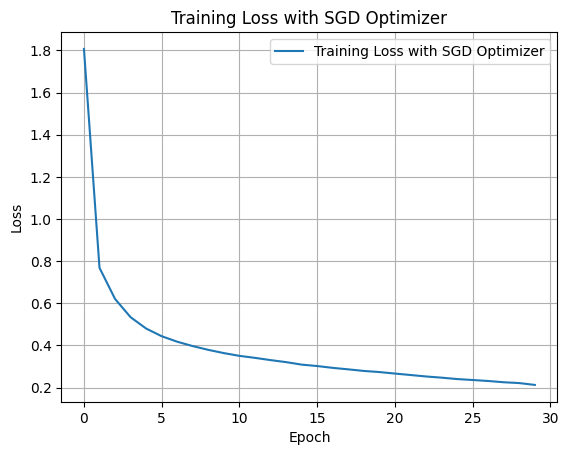

In [31]:
#Training Function Using SGD Optimizer
#Train the network for 30 epochs
def train_with_optimizer(net, optimizer, criterion, num_epochs=30):
    print("\nTraining with Optimizer (SGD)")
    net.train()

    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    print('Finished Training with Optimizer (SGD)')
    return train_losses

# Train the network
losses_with_optimizer = train_with_optimizer(net, optimizer, criterion, num_epochs=30)

# Plot the training losses
plt.figure()
plt.plot(losses_with_optimizer, label='Training Loss with SGD Optimizer')
plt.title('Training Loss with SGD Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### **Step 5: Evaluate the Model-**

In [32]:
#To store all accuracy
Overall_Accuracy=[]

# Evaluating the Final Model

def evaluate_network():
    net.eval()
    correct = 0
    total = 0
    class_correct = [0] * 10
    class_total = [0] * 10
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Per-class accuracy
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    accuracy_neuron_512= (f'{100 * correct / total:.2f}%')
    print(f'Overall Accuracy on the test set: {accuracy_neuron_512}\n')
    Overall_Accuracy.append(accuracy_neuron_512)
    # Print accuracy for each class
    for i in range(10):
        if class_total[i] > 0:
            print(f'Accuracy of {classes[i]:>10s}: {100 * class_correct[i] / class_total[i]:.2f}%')
        else:
            print(f'Accuracy of {classes[i]:>10s}: N/A (no samples)')

# Call the evaluation function
evaluate_network()

Overall Accuracy on the test set: 88.29%

Accuracy of T-shirt/top: 88.40%
Accuracy of    Trouser: 96.60%
Accuracy of   Pullover: 84.40%
Accuracy of      Dress: 89.40%
Accuracy of       Coat: 74.40%
Accuracy of     Sandal: 96.90%
Accuracy of      Shirt: 66.50%
Accuracy of    Sneaker: 95.40%
Accuracy of        Bag: 96.50%
Accuracy of Ankle boot: 94.40%


#### **Observation-**

Here, overall accuracy is 88.29%.

*   I Use ReLU as the activation function after the hidden layer.
*   I Use an optimizer (optim.SGD) with a learning rate of 0.01.

*   The number of neurons in the hidden layer to 512, 256, 128, 64.
*   There are some classes where the accuracy is notably high, such as Bag (96.50%) and Trouser (96.60%).

*    However, other classes like Shirt (66.50%) and Coat (74.40%) have lower accuracies, indicating the model struggles with these items.


### **Step 6: Experimentation-**

#### **For, 10 neurons in the hidden layer-**


Training with Optimizer (SGD)
Epoch [1/30], Loss: 0.2084
Epoch [2/30], Loss: 0.2063
Epoch [3/30], Loss: 0.2007
Epoch [4/30], Loss: 0.1944
Epoch [5/30], Loss: 0.1906
Epoch [6/30], Loss: 0.1844
Epoch [7/30], Loss: 0.1809
Epoch [8/30], Loss: 0.1782
Epoch [9/30], Loss: 0.1745
Epoch [10/30], Loss: 0.1686
Epoch [11/30], Loss: 0.1639
Epoch [12/30], Loss: 0.1617
Epoch [13/30], Loss: 0.1581
Epoch [14/30], Loss: 0.1524
Epoch [15/30], Loss: 0.1482
Epoch [16/30], Loss: 0.1446
Epoch [17/30], Loss: 0.1413
Epoch [18/30], Loss: 0.1359
Epoch [19/30], Loss: 0.1318
Epoch [20/30], Loss: 0.1281
Epoch [21/30], Loss: 0.1264
Epoch [22/30], Loss: 0.1230
Epoch [23/30], Loss: 0.1200
Epoch [24/30], Loss: 0.1179
Epoch [25/30], Loss: 0.1137
Epoch [26/30], Loss: 0.1089
Epoch [27/30], Loss: 0.1067
Epoch [28/30], Loss: 0.1040
Epoch [29/30], Loss: 0.1022
Epoch [30/30], Loss: 0.0967
Finished Training with Optimizer (SGD)


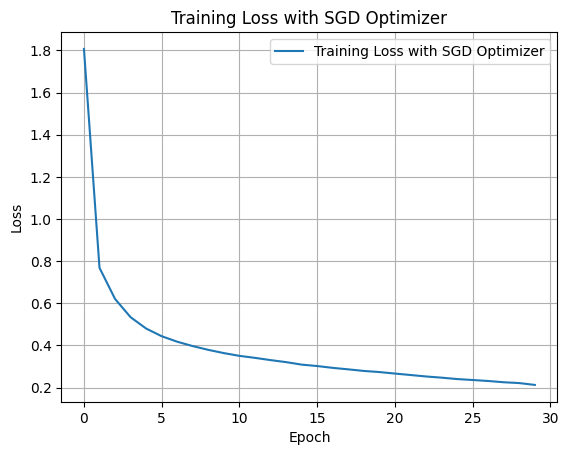

Overall Accuracy on the test set: 88.23%

Accuracy of T-shirt/top: 82.50%
Accuracy of    Trouser: 97.20%
Accuracy of   Pullover: 68.80%
Accuracy of      Dress: 90.00%
Accuracy of       Coat: 84.80%
Accuracy of     Sandal: 94.50%
Accuracy of      Shirt: 74.80%
Accuracy of    Sneaker: 96.20%
Accuracy of        Bag: 96.80%
Accuracy of Ankle boot: 96.70%


In [33]:
class SimpleNet10(nn.Module):
    def __init__(self):
        super(SimpleNet10, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 10)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(10, 10)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(10, 10)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(10, 10)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(10, 10)  # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.fc5(x)
        return x

net_10 = SimpleNet10()

# Define loss function and optimizer
criterion_10 = nn.CrossEntropyLoss()
optimizer_10 = optim.SGD(net.parameters(), lr=0.01)  # Using Stochastic gradient descent optimizer

#Training Function Using SGD Optimizer
#Train the network for 30 epochs
def train_with_optimizer_10(net_10, optimizer_10, criterion_10, num_epochs=30):
    print("\nTraining with Optimizer (SGD)")
    net.train()

    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    print('Finished Training with Optimizer (SGD)')
    return train_losses

# Train the network
losses_with_optimizer_10 = train_with_optimizer_10(net_10, optimizer_10, criterion_10, num_epochs=30)

# Plot the training losses
plt.figure()
plt.plot(losses_with_optimizer, label='Training Loss with SGD Optimizer')
plt.title('Training Loss with SGD Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluating the Final Model

def evaluate_network_10():
    net_10.eval()
    correct = 0
    total = 0
    class_correct = [0] * 10
    class_total = [0] * 10
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Per-class accuracy
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    accuracy_neuron_10= (f'{100 * correct / total:.2f}%')
    print(f'Overall Accuracy on the test set: {accuracy_neuron_10}\n')
    Overall_Accuracy.append(accuracy_neuron_10)
    # Print accuracy for each class
    for i in range(10):
        if class_total[i] > 0:
            print(f'Accuracy of {classes[i]:>10s}: {100 * class_correct[i] / class_total[i]:.2f}%')
        else:
            print(f'Accuracy of {classes[i]:>10s}: N/A (no samples)')

# Call the evaluation function
evaluate_network_10()





##### **Observation-**

Here, overall test set accuracy is 88.23%, which is fairly strong, but there are some notable variations in accuracy across different classes.



*   Here, the number of neurons in the hidden layer is 10.
*   Trouser (97.20%), Sandal (94.50%), Sneaker (96.20%), Bag (96.80%), and Ankle boot (96.70%) are performing very well, with accuracies above 95%. The model has a solid grasp of these categories.

*   Coat (84.80%) and Dress (90.00%) have decent accuracy, though there's room for improvement.
*  T-shirt/top (82.50%), Pullover (68.80%), and Shirt (74.80%) are performing at lower levels, and the model struggles more with distinguishing these items.



#### **For, 50 neurons in the hidden layer-**


Training with Optimizer (SGD)
Epoch [1/30], Loss: 0.0958
Epoch [2/30], Loss: 0.0930
Epoch [3/30], Loss: 0.0917
Epoch [4/30], Loss: 0.0912
Epoch [5/30], Loss: 0.0859
Epoch [6/30], Loss: 0.0820
Epoch [7/30], Loss: 0.0821
Epoch [8/30], Loss: 0.0768
Epoch [9/30], Loss: 0.0781
Epoch [10/30], Loss: 0.0750
Epoch [11/30], Loss: 0.0758
Epoch [12/30], Loss: 0.0666
Epoch [13/30], Loss: 0.0677
Epoch [14/30], Loss: 0.0655
Epoch [15/30], Loss: 0.0606
Epoch [16/30], Loss: 0.0600
Epoch [17/30], Loss: 0.0786
Epoch [18/30], Loss: 0.0595
Epoch [19/30], Loss: 0.0585
Epoch [20/30], Loss: 0.0540
Epoch [21/30], Loss: 0.0519
Epoch [22/30], Loss: 0.0520
Epoch [23/30], Loss: 0.0476
Epoch [24/30], Loss: 0.0522
Epoch [25/30], Loss: 0.0467
Epoch [26/30], Loss: 0.0435
Epoch [27/30], Loss: 0.0433
Epoch [28/30], Loss: 0.0481
Epoch [29/30], Loss: 0.0429
Epoch [30/30], Loss: 0.0343
Finished Training with Optimizer (SGD)


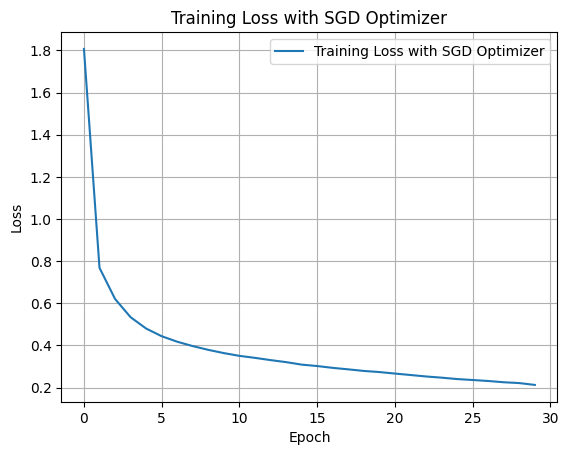

Overall Accuracy on the test set: 89.65%

Accuracy of T-shirt/top: 90.40%
Accuracy of    Trouser: 98.00%
Accuracy of   Pullover: 84.60%
Accuracy of      Dress: 90.50%
Accuracy of       Coat: 84.20%
Accuracy of     Sandal: 96.70%
Accuracy of      Shirt: 64.80%
Accuracy of    Sneaker: 97.80%
Accuracy of        Bag: 96.00%
Accuracy of Ankle boot: 93.50%


In [34]:
class SimpleNet50(nn.Module):
    def __init__(self):
        super(SimpleNet50, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 50)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(50, 50)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(50, 50)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(50, 50)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(50, 10)  # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.fc5(x)
        return x

net_50 = SimpleNet50()

# Define loss function and optimizer
criterion_50 = nn.CrossEntropyLoss()
optimizer_50 = optim.SGD(net.parameters(), lr=0.01)  # Using Stochastic gradient descent optimizer

#Training Function Using SGD Optimizer
#Train the network for 30 epochs
def train_with_optimizer_50(net_50, optimizer_50, criterion_50, num_epochs=30):
    print("\nTraining with Optimizer (SGD)")
    net.train()

    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    print('Finished Training with Optimizer (SGD)')
    return train_losses

# Train the network
losses_with_optimizer_50 = train_with_optimizer_50(net_50, optimizer_50, criterion_50, num_epochs=30)

# Plot the training losses
plt.figure()
plt.plot(losses_with_optimizer, label='Training Loss with SGD Optimizer')
plt.title('Training Loss with SGD Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluating the Final Model

def evaluate_network_50():
    net_50.eval()
    correct = 0
    total = 0
    class_correct = [0] * 10
    class_total = [0] * 10
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Per-class accuracy
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    accuracy_neuron_50= (f'{100 * correct / total:.2f}%')
    print(f'Overall Accuracy on the test set: {accuracy_neuron_50}\n')
    Overall_Accuracy.append(accuracy_neuron_50)
    # Print accuracy for each class
    for i in range(10):
        if class_total[i] > 0:
            print(f'Accuracy of {classes[i]:>10s}: {100 * class_correct[i] / class_total[i]:.2f}%')
        else:
            print(f'Accuracy of {classes[i]:>10s}: N/A (no samples)')

# Call the evaluation function
evaluate_network_50()

##### **Observation-**

With an overall accuracy of 89.65%, this model is performing well, but there are still some notable variations across different classes.
*   Here, the number of neurons in the hidden layer is 50.
*   Trouser (98.00%), Sandal (96.70%), Sneaker (97.80%), Bag (96.00%), and Ankle boot (93.50%) are all achieving accuracy close to or above 95%, which indicates strong performance for these items.
*   Dress (90.50%) and Pullover (84.60%) are performing reasonably well, but there is room for improvement, especially in the "Pullover" class.
*   T-shirt/top (90.40%) and Coat (84.20%) have moderate accuracies, while Shirt (64.80%) is significantly lower, showing that the model is struggling with this class.


#### **For, 100 neurons in the hidden layer-**


Training with Optimizer (SGD)
Epoch [1/30], Loss: 0.0395
Epoch [2/30], Loss: 0.0352
Epoch [3/30], Loss: 0.0340
Epoch [4/30], Loss: 0.0370
Epoch [5/30], Loss: 0.0354
Epoch [6/30], Loss: 0.0346
Epoch [7/30], Loss: 0.0398
Epoch [8/30], Loss: 0.0298
Epoch [9/30], Loss: 0.0313
Epoch [10/30], Loss: 0.0294
Epoch [11/30], Loss: 0.0418
Epoch [12/30], Loss: 0.0416
Epoch [13/30], Loss: 0.0259
Epoch [14/30], Loss: 0.0170
Epoch [15/30], Loss: 0.0209
Epoch [16/30], Loss: 0.0239
Epoch [17/30], Loss: 0.0260
Epoch [18/30], Loss: 0.0287
Epoch [19/30], Loss: 0.0245
Epoch [20/30], Loss: 0.0147
Epoch [21/30], Loss: 0.0088
Epoch [22/30], Loss: 0.0094
Epoch [23/30], Loss: 0.0103
Epoch [24/30], Loss: 0.0049
Epoch [25/30], Loss: 0.0117
Epoch [26/30], Loss: 0.0092
Epoch [27/30], Loss: 0.0402
Epoch [28/30], Loss: 0.0271
Epoch [29/30], Loss: 0.0203
Epoch [30/30], Loss: 0.0159
Finished Training with Optimizer (SGD)


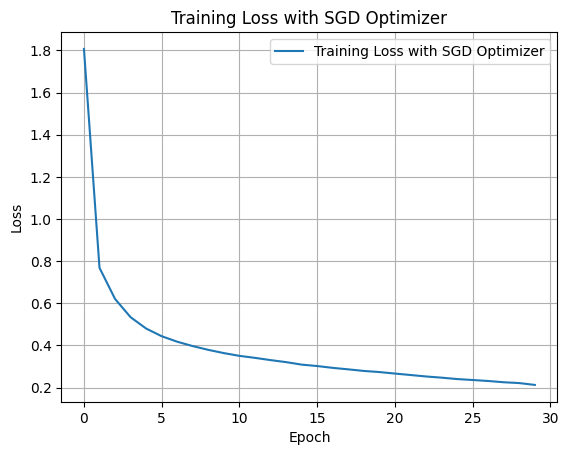

Overall Accuracy on the test set: 88.67%

Accuracy of T-shirt/top: 82.80%
Accuracy of    Trouser: 96.90%
Accuracy of   Pullover: 83.80%
Accuracy of      Dress: 94.00%
Accuracy of       Coat: 72.20%
Accuracy of     Sandal: 95.40%
Accuracy of      Shirt: 72.20%
Accuracy of    Sneaker: 97.20%
Accuracy of        Bag: 96.50%
Accuracy of Ankle boot: 95.70%


In [35]:
class SimpleNet100(nn.Module):
    def __init__(self):
        super(SimpleNet100, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 100)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(100, 100)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(100, 100)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(100, 100)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(100, 10)  # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.fc5(x)
        return x

net_100 = SimpleNet100()

# Define loss function and optimizer
criterion_100 = nn.CrossEntropyLoss()
optimizer_100 = optim.SGD(net.parameters(), lr=0.01)  # Using Stochastic gradient descent optimizer

#Training Function Using SGD Optimizer
#Train the network for 30 epochs
def train_with_optimizer_100(net_100, optimizer_100, criterion_100, num_epochs=30):
    print("\nTraining with Optimizer (SGD)")
    net.train()

    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    print('Finished Training with Optimizer (SGD)')
    return train_losses

# Train the network
losses_with_optimizer_100 = train_with_optimizer_100(net_100, optimizer_100, criterion_100, num_epochs=30)

# Plot the training losses
plt.figure()
plt.plot(losses_with_optimizer, label='Training Loss with SGD Optimizer')
plt.title('Training Loss with SGD Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluating the Final Model

def evaluate_network_100():
    net_100.eval()
    correct = 0
    total = 0
    class_correct = [0] * 10
    class_total = [0] * 10
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Per-class accuracy
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    accuracy_neuron_100= (f'{100 * correct / total:.2f}%')
    print(f'Overall Accuracy on the test set: {accuracy_neuron_100}\n')
    Overall_Accuracy.append(accuracy_neuron_100)
    # Print accuracy for each class
    for i in range(10):
        if class_total[i] > 0:
            print(f'Accuracy of {classes[i]:>10s}: {100 * class_correct[i] / class_total[i]:.2f}%')
        else:
            print(f'Accuracy of {classes[i]:>10s}: N/A (no samples)')

# Call the evaluation function
evaluate_network_100()

##### **Observation-**

With an overall accuracy of 88.67%, this model is showing continued improvement, especially for classes that previously had lower accuracy.

*   Here, the number of neurons in the hidden layer is 100.
*   Trouser (96.90%), Sandal (95.40%), Sneaker (97.20%), Bag (96.50%), and Ankle boot (95.70%) continue to perform well, with accuracies close to or above 96%, indicating strong generalization for these categories.
*   T-shirt/top (82.80%), Pullover (83.80%), and Dress (94.00%) are performing well but have slightly lower accuracy. These classes are improving and are now in the mid-to-high 80% range.
*   Coat (72.20%) is still moderately low, and Shirt (72.20%) remains the weakest class, though it has slightly improved from previous iterations (up from 68.70%).


#### **Comparison**

In [ ]:
# Remove the '%' sign and convert to float
Overall_Accuracy = [float(acc.strip('%')) for acc in Overall_Accuracy]

In [49]:
# Create the dictionary with the Neuron and Overall_Accuracy values
d = {
    'Neuron': ['512', '10', '50', '100'],
    'Overall_Accuracy': Overall_Accuracy
}

# Convert dictionary to DataFrame
d = pd.DataFrame(d)

# Round the Overall_Accuracy values to 2 decimal places
d['Overall_Accuracy'] = d['Overall_Accuracy'].round(2)

# Display the DataFrame in Google Colab
from IPython.display import display
display(d)

,Neuron,Overall_Accuracy
0,512,88.29
1,10,88.23
2,50,89.65
3,100,88.67


##### **For Neuron 512, 256, 128, and 64-**

*   **Overall Accuracy:** 88.29%
*   **Highest Accuracies:** "Sandal" (96.90%), "Bag" (96.50%), "Trouser" (96.60%)
*   **Lowest Accuracy:** "Shirt" (66.50%), "Coat" (74.40%)
*   **Increased Representation Power:**
Increasing the number of neurons in the hidden layers (512 → 256 → 128 → 64) allows the model to capture more complex patterns in the data, leading to high accuracy in some classes like Sandal, Bag, and Trouser (above 96%).
*   **Overfitting to Certain Classes:**
With a more complex model, there might be a risk of overfitting to specific classes. For instance, T-shirt/top (88.40%) and Pullover (84.40%) have good accuracy, but simpler classes like "Shirt" (66.50%) and "Coat" (74.40%) may not benefit as much from the additional model capacity.
*   **Diminishing Returns in Accuracy:**
As model complexity increases, the overall accuracy improvement plateaus. Although there's an improvement from simpler models, the accuracy on certain difficult classes like Shirt remains low despite increasing the model's complexity.
*   **Sensitivity to Hyperparameters:**
With more layers and neurons, the model becomes more sensitive to hyperparameters like the learning rate and optimizer settings. Fine-tuning parameters like learning rate, regularization, and dropout becomes critical to prevent overfitting and maximize generalization.
*   **Increased Computational Cost:**
Increasing the number of neurons significantly increases the training time and computational resources needed. While this complexity brings improvement for some classes, simpler models might provide nearly comparable performance at a lower computational cost for other tasks.









##### **For Neuron 10-**
*   **Overall Accuracy:** 88.23%
*   **Best-performing Classes:** Trouser (97.20%), Ankle boot (96.70%), Bag (96.80%)
*   **Struggling Classes:** Pullover (68.80%), Shirt (74.80%)
*   **Higher Neurons in Hidden Layers Enhance Learning Capacity:**
Increasing the number of neurons beyond 10 provides the model with a larger capacity to learn more complex features and patterns, which may improve performance for harder-to-classify classes (e.g., Pullover (68.80%) and Shirt (74.80%)).
*   **Overfitting Risk:**
As model complexity increases (more neurons or layers), there is a risk of overfitting, especially if the dataset is small. Overfitting could lead to lower generalization on the test set, despite higher accuracy on the training set.
*   **Improved Accuracy for Certain Classes:**
Increasing neurons often improves the performance for classes that the model struggles with, such as Pullover and Shirt, because a more complex model can better distinguish subtle differences in these classes.
*   **Training Time and Resource Demands:**
More neurons mean more parameters, which increases computational demands. Training time will increase significantly as you scale up the number of neurons or layers.

##### **For Neuron 50-**

*   **Overall Accuracy:** 89.65%
*   **Best-performing Classes:** Trouser: (98.00%), Sneaker: (97.80%), Sandal: (96.70%).
*   **Struggling Classes:** Shirt: (64.80%), Coat: (84.20%), Pullover: (84.60%).
*   **Improved Overall Accuracy:**
With a hidden layer of 50 neurons and ReLU activation, your overall accuracy reached 89.65%. This shows that the model is capturing patterns better, but more complex models may overfit without careful tuning.
*   **High Accuracy for Clear Categories:**
Categories like Trouser (98%), Sneaker (97.8%), and Sandal (96.7%) are highly accurate. This suggests the current model complexity is sufficient for well-defined features in these categories.
*   **Impact on Training Time:**
More complex models (with more neurons or layers) will generally require longer training times and may need more data for optimal performance. You're training for 30 epochs, which may need to increase with more complexity to reach convergence.
*   **Overfitting Risk:**
The high accuracy for classes like Trouser and Sneaker combined with lower accuracy for classes like Shirt indicates that the model could be overfitting certain classes. Adding regularization techniques or adjusting model complexity can help balance performance across all classes.





##### **For Neuron 100-**

*   **Overall Accuracy:** 88.67%
*   **Best-performing Classes:** Sneaker: (97.20%), Trouser: (96.90%), Bag: (96.50%).
*   **Struggling Classes:** Shirt: (72.20%), Coat: (72.20%), T-shirt/top: (82.80%).
  
*   **Improved Overall Performance:**
Increasing the number of neurons from 50 to 100 generally allows the model to learn more complex patterns in the data, which can lead to better overall accuracy. In this case, your overall accuracy improved to 88.67%.


*   **Enhanced Class Distinction:**
Some classes (e.g., "Trouser" and "Dress") show very high accuracy, indicating that the model benefits from increased capacity to differentiate between similar classes. However, some classes (e.g., "Coat" and "Shirt") still struggle, suggesting that merely increasing complexity doesn’t guarantee improvement for all classes.

*   **Risk of Overfitting:**
With more neurons, there’s a higher risk of overfitting, especially if the training data is limited. This could lead to good training performance but poorer generalization on the test set. Monitoring loss values, as shown in our training output, is essential to catch overfitting early.

*   **Increased Training Time and Resource Demand:**
More complexity typically leads to longer training times and increased computational resources required. While your loss values appear to decrease steadily, it's essential to balance complexity with the efficiency of training.





##### **Summary-**
*   **Neuron = 10:**
 *   **Overall Accuracy:** 88.23%
 *   **Observation:** Minimal complexity leads to decent accuracy, but limited capacity may restrict learning.

*   **Neuron = 50:**
 *   **Overall Accuracy:** 89.65%
 *   **Observation:** This configuration provides the best performance, suggesting an optimal balance between model complexity and generalization.

*   **Neuron = 100:**
 *   **Overall Accuracy:** 88.67%
 *   **Observation:** Slightly lower accuracy than 50 neurons, indicating potential overfitting or diminishing returns from increased complexity.

*   **Neuron = 512:**
 *   **Overall Accuracy:** 88.29%
 *   **Observation:** High complexity with 512 neurons does not significantly improve accuracy compared to 50 neurons, suggesting overfitting may be a concern.

### **Step 7: Regularization Techniques-**


Training with L2 Regularization
Epoch [1/30], Loss: 1.8574
Epoch [2/30], Loss: 1.0831
Epoch [3/30], Loss: 0.8830
Epoch [4/30], Loss: 0.7984
Epoch [5/30], Loss: 0.7484
Epoch [6/30], Loss: 0.7107
Epoch [7/30], Loss: 0.6891
Epoch [8/30], Loss: 0.6618
Epoch [9/30], Loss: 0.6433
Epoch [10/30], Loss: 0.6316
Epoch [11/30], Loss: 0.6192
Epoch [12/30], Loss: 0.6072
Epoch [13/30], Loss: 0.5976
Epoch [14/30], Loss: 0.5903
Epoch [15/30], Loss: 0.5837
Epoch [16/30], Loss: 0.5776
Epoch [17/30], Loss: 0.5755
Epoch [18/30], Loss: 0.5701
Epoch [19/30], Loss: 0.5639
Epoch [20/30], Loss: 0.5600
Epoch [21/30], Loss: 0.5566
Epoch [22/30], Loss: 0.5529
Epoch [23/30], Loss: 0.5503
Epoch [24/30], Loss: 0.5483
Epoch [25/30], Loss: 0.5463
Epoch [26/30], Loss: 0.5424
Epoch [27/30], Loss: 0.5380
Epoch [28/30], Loss: 0.5373
Epoch [29/30], Loss: 0.5352
Epoch [30/30], Loss: 0.5357


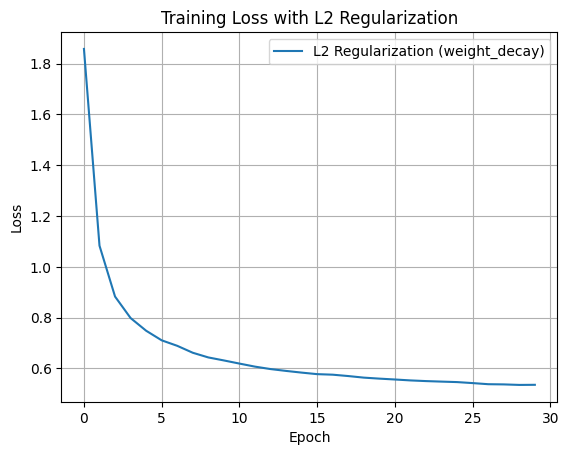


Evaluating model trained with L2 regularization:
Overall Accuracy on the test set: 83.81%

Accuracy of T-shirt/top: 83.40%
Accuracy of    Trouser: 94.60%
Accuracy of   Pullover: 69.70%
Accuracy of      Dress: 87.90%
Accuracy of       Coat: 77.10%
Accuracy of     Sandal: 93.30%
Accuracy of      Shirt: 54.10%
Accuracy of    Sneaker: 92.60%
Accuracy of        Bag: 94.80%
Accuracy of Ankle boot: 90.60%


In [50]:
# Defining the Neural Network with Dropout

class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.5)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 10)  # 10 output classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the images
        x = self.dropout1(self.relu1(self.fc1(x)))
        x = self.dropout2(self.relu2(self.fc2(x)))
        x = self.dropout3(self.relu3(self.fc3(x)))
        x = self.fc4(x)  # Output layer (no activation, will use CrossEntropyLoss)
        return x

# Initialize the network with dropout
net = NetWithDropout()

# Define the loss function (Cross-Entropy Loss) and optimizer
criterion = nn.CrossEntropyLoss()

# L2 Regularization using weight_decay in the optimizer
optimizer_l2 = optim.SGD(net.parameters(), lr=0.01, weight_decay=0.01)  # L2 regularization

# Function for training with L2 regularization (via weight_decay)
def train_with_l2_regularization(net, optimizer, criterion, num_epochs=30):
    print("\nTraining with L2 Regularization")
    train_losses = []

    for epoch in range(num_epochs):
        net.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()         # Zero gradients
            outputs = net(inputs)         # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()               # Backpropagation
            optimizer.step()              # Update weights
            running_loss += loss.item()

        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    return train_losses

# Train the model with L2 regularization
train_losses_l2 = train_with_l2_regularization(net, optimizer_l2, criterion, num_epochs=30)

# Plot the training loss for L2 regularization
plt.figure()
plt.plot(train_losses_l2, label='L2 Regularization (weight_decay)')
plt.title('Training Loss with L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluating the Final Model

def evaluate_network():
    net.eval()
    correct = 0
    total = 0
    class_correct = [0] * 10
    class_total = [0] * 10
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Per-class accuracy
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    accuracy_L2_regularization= (f'{100 * correct / total:.2f}%')
    print(f'Overall Accuracy on the test set: {accuracy_L2_regularization}\n')
    # Print accuracy for each class
    for i in range(10):
        if class_total[i] > 0:
            print(f'Accuracy of {classes[i]:>10s}: {100 * class_correct[i] / class_total[i]:.2f}%')
        else:
            print(f'Accuracy of {classes[i]:>10s}: N/A (no samples)')

# Evaluate the model trained with L2 regularization
print("\nEvaluating model trained with L2 regularization:")
evaluate_network()



#### **Observation-**

**Overall Test Set Accuracy:**

*   **L2 Regularization + Dropout:** 83.81%
*   In previous runs without dropout or with a simpler configuration, you reported accuracies ranging between 87.82% and 88.90%. Thus, the addition of dropout and L2 regularization resulted in a lower overall accuracy.
*   Classes such as Trouser (94.60%), Sandal (93.30%), and Bag (94.80%) still maintain relatively high accuracy but show a slight drop compared to previous training without dropout.
*   Notably, there is a significant drop in the accuracy of the Shirt (54.10%) class compared to previous attempts (where it was around 66.50% - 75.50%).
Similarly, Pullover (69.70%) and Coat (77.10%) also show decreased accuracy.




### **Final Discussion-**

1.   **Neuron Configurations Without Regularization:**
 *   **10 Neurons:** 88.23% Accuracy. Limited capacity, but decent performance, indicating that the model can still generalize fairly well with fewer neurons.
 *   **50 Neurons:** 89.65% Accuracy. Best overall performance, suggesting this is the optimal balance between model complexity and generalization.
 *   **100 Neurons:** 88.67% Accuracy. Slight drop in accuracy, which may indicate diminishing returns or minor overfitting as the model grows more complex.
 *   **512 Neurons:** 88.29% Accuracy. Performance decreases, likely due to overfitting or too much capacity, where the model memorizes the training data but struggles to generalize well to the test data.

2.   **Impact of Dropout (0.5) and L2 Regularization:**
 *   After applying dropout with a 0.5 probability and L2 regularization through weight_decay, the overall accuracy on the test set dropped to **83.81%**.
 *   Dropout combats overfitting by randomly deactivating neurons during training, but a 0.5 probability may be too aggressive, reducing the model's ability to capture complex patterns.
 *   L2 regularization penalizes large weights, promoting generalization, but too much regularization can lead to underfitting, as seen in the drop in accuracy.

3.   **Key Takeaways:**

 *   50 neurons provided the best performance (89.65%), balancing complexity and generalization.
 *   Adding dropout (0.5) and L2 regularization led to a significant decrease in accuracy (83.81%), suggesting that this combination caused underfitting, especially with more complex patterns.
 *   The results highlight the need for a balanced model complexity: increasing neurons without regularization initially improves accuracy but then plateaus or decreases due to overfitting.

In conclusion, while adding dropout and L2 regularization helps prevent overfitting, too much regularization can reduce the model's performance, as seen in the final result. The 50 neurons configuration appears optimal without excessive regularization.